In [227]:
import textstat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })
plt.rcParams["font.family"] = "Times"
plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'font.size': 20})
from scipy import stats

In [228]:
annotations = pd.read_csv("data/llama_gsm_evaluations.csv")
ft_annotations = pd.read_csv("data/annotations.csv")
mathwell = ft_annotations[ft_annotations['model']=="mathwell"]
llama = ft_annotations[ft_annotations['model']=="llama"]
ft_llama = ft_annotations[ft_annotations['model']=="finetuned_llama"]
llama_gsm = annotations[annotations['model']=="llama_gsm"]

In [241]:
mathwell
mathwell['model']= "FT + Prompt: EGSM Train"

/var/folders/ms/lv6zlm_16wx8dzf7c_t51b0r0000gn/T/ipykernel_21537/2365864715.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mathwell['model']= "FT + Prompt: EGSM Train"


In [242]:
llama
llama['model'] = "Prompt: EGSM Train"

/var/folders/ms/lv6zlm_16wx8dzf7c_t51b0r0000gn/T/ipykernel_21537/31396616.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  llama['model'] = "Prompt: EGSM Train"


In [243]:
ft_llama
ft_llama['model'] = "FT: GSM8K; Prompt: Appropriate GSM8K Examples"
def recode(df):
    if df['solvability']==0:
        return np.nan
    else:
        return df['appropriateness']
ft_llama['appropriateness']= ft_llama.apply(recode, axis=1)

/var/folders/ms/lv6zlm_16wx8dzf7c_t51b0r0000gn/T/ipykernel_21537/1691071809.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ft_llama['model'] = "FT: GSM8K; Prompt: Appropriate GSM8K Examples"
/var/folders/ms/lv6zlm_16wx8dzf7c_t51b0r0000gn/T/ipykernel_21537/1691071809.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ft_llama['appropriateness']= ft_llama.apply(recode, axis=1)


In [244]:
llama_gsm = llama_gsm.rename(columns = {'good': 'mac'})
cols = ft_llama.columns.tolist()
llama_gsm = llama_gsm[cols]
llama_gsm['model'] = "Prompt: GSM8K"

In [245]:
df = pd.concat([mathwell, llama, ft_llama, llama_gsm])
df_all = df
df = df.groupby('model').mean('appropriateness')
df = df.reset_index()
df = df.sort_values('appropriateness', ascending=True)

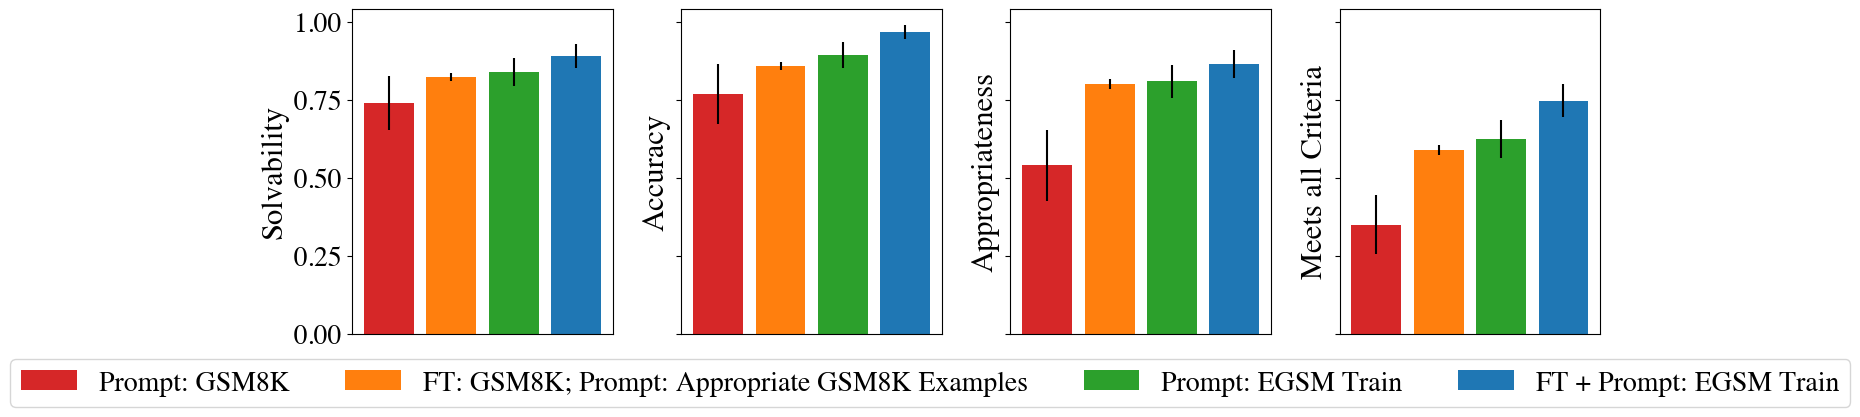

In [248]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(14, 4), sharey=True)

# Plot settings
plot_settings = [
    ('solvability', axs[0], "Solvability"),
    ('accuracy', axs[1], "Accuracy"),
    ('appropriateness', axs[2], "Appropriateness"),
    ('mac', axs[3], "Meets all Criteria")
]


color = ['tab:red', 'tab:orange', 'tab:green', 'tab:blue']
for metric, ax, ylabel in plot_settings:
    ax.bar(df['model'], df[metric], label = df['model'], color = color, yerr = [1.96*stats.sem(df_all[df_all['model']==model][metric].dropna()) for model in df['model']])
    ax.set_xlabel("")
    ax.set_ylabel(ylabel, size=22)
    ax.set_xticks([])

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(.5, -.01), loc='center',ncol=4)
plt.tight_layout()
plt.savefig('metrics_bar_plots.pdf', bbox_inches='tight')
#$plt.savefig('metrics_bar_plots.pdf')

Text(0, 0.5, 'MaC')

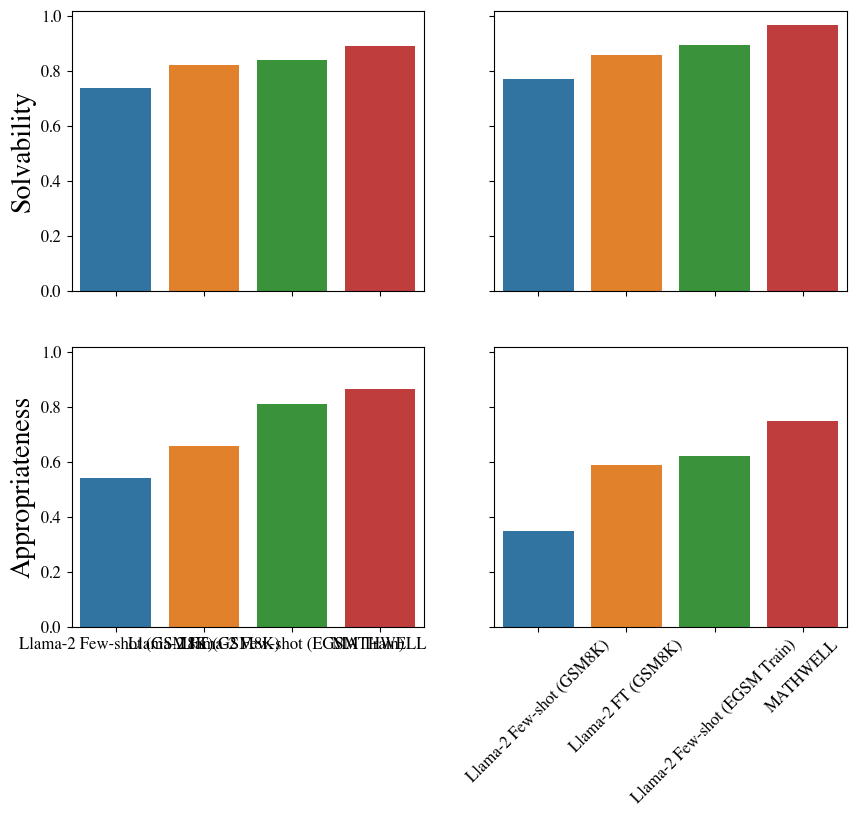

In [53]:
import seaborn as sns
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), sharex = True, sharey = True)
# Create the bar plot
sns.barplot(x='model', y='solvability', data=df, hue='model', legend = False, ax = axs[0,0], errorbar=('ci', 95))
axs[0,0].tick_params(axis='x', which='both', rotation=45)
# Remove x-axis labels
axs[0,0].set_xlabel("")
axs[0,0].set_ylabel("Solvability", size = 20)

sns.barplot(x='model', y='accuracy', data=df, hue='model', legend = False, ax =axs[0,1], errorbar=('ci', 95))
plt.xticks(rotation=45)
# Remove x-axis labels
axs[0,1].set_xlabel("")
axs[0,1].set_ylabel("Accuracy", size = 20)

sns.barplot(x='model', y='appropriatenesss', data=df, hue='model', legend = False, ax =axs[,1], errorbar=('ci', 95))
plt.xticks(rotation=45)
# Remove x-axis labels
axs[1,1].set_xlabel("")
axs[,1].set_ylabel("Appropriateness", size = 20)

sns.barplot(x='model', y='mac', data=df, hue='model', legend = False, ax =axs[1,1], errorbar=('ci', 95))
plt.xticks(rotation=45)
# Remove x-axis labels
axs[1,1].set_xlabel("")
axs[1,1].set_ylabel("MaC", size = 20)

In [ ]:
# Create a figure with two subplots (2 rows, 1 column)
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), sharex = True, sharey = True)

axs[0,0].hist(sgsm_grades[0], bins=30, alpha=0.5, label='SGSM', edgecolor='black', density=True)
axs[0,1].hist(gsm8k_grades[0], bins=30, alpha=0.5, label='MathInstruct GSM8K', edgecolor='black', density=True, color = "Red")
axs[1,0].hist(svamp_grades, bins=30, alpha=0.5, label='SVAMP', edgecolor='black', density=True, color = "Purple")
axs[1,1].hist(asdiv_grades, bins=30, alpha=0.5, label='ASDIV', edgecolor='black', density=True, color = "Orange")
axs[0, 0].set_title('SGSM')
axs[0, 1].set_title('GSM8K')
axs[1, 0].set_title('SVAMP')
axs[1, 1].set_title('ASDIV')
# axs[0, 0].legend()
# axs[0, 1].legend()
# axs[1, 0].legend()
# axs[1, 1].legend()
axs[0,0].axvline(np.mean(sgsm_grades[0]), color='k', linestyle='dashed', linewidth=3)
axs[0,1].axvline(np.mean(gsm8k_grades[0]), color='k', linestyle='dashed', linewidth=3)
axs[1,0].axvline(np.mean(svamp_grades), color='k', linestyle='dashed', linewidth=3)
axs[1,1].axvline(np.mean(asdiv_grades), color='k', linestyle='dashed', linewidth=3)
axs[0, 0].set_xlabel('FKGL')
axs[0,0].tick_params(axis='both', which='both', labelsize=22, labelbottom=True)
axs[0,1].tick_params(axis='both', which='both', labelsize=22, labelbottom=True)
axs[0,1].tick_params(axis='y', which='both', labelsize=22, labelleft=True)
axs[1,1].tick_params(axis='y', which='both', labelsize=22, labelleft=True)
axs[0, 0].set_ylabel('Density')
axs[0, 1].set_xlabel('FKGL')
axs[0, 1].set_ylabel('Density')
axs[1, 0].set_xlabel('FKGL')
axs[1, 0].set_ylabel('Density')
axs[1, 1].set_xlabel('FKGL')
axs[1, 1].set_ylabel('Density')

# Customize the overall layout
plt.tight_layout()
plt.savefig('reading_level_datasets_sgsm.pdf')